In [120]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import spacy
import json
import gensim
from climdist.data import load as cd_load
from Levenshtein import distance as lev
import matplotlib.pyplot as plt

In [21]:
df = cd_load('main', readability=True, heading2=True).convert_dtypes()

In [156]:
main_headings = df.heading2.value_counts()
main_headings[lambda x: x>100]

Paris                    8067
Inland                   7672
London                   6895
Neueste Nachrichten      6054
Berlin                   5465
                         ... 
Montenegro                104
Krim                      103
Donaufürstenthümer        103
Vom Kriegsschauplatze     103
Zu verkaufen              102
Name: heading2, Length: 195, dtype: Int64

In [557]:
def compare(title, treshold, prnt=False):
    if prnt:
        print(title)
    #print(round(treshold/len(title), 3))
    #originals = df.heading2.value_counts()[title]
    #print(originals)
    increases = 0
    results = set()
    for entry in df.heading[df.heading != title].values:
        #print(type(title), type(entry))
        if lev(str(title), str(entry)) <= treshold:
            results.add(entry)
            increases += 1
            
    #print(increases/df.heading2.value_counts()[title])        
    return results, increases

In [307]:
def get_elbow(heading, log=False):
    
    edit_dists = range(round(len(heading)*0.1), round(len(heading)*0.6))
    increases = []
    
    for dist in tqdm(edit_dists):
        headigs, heading_increase = compare(heading, dist)
        increases.append(heading_increase)
            
    plt.figure(figsize=(6,4))
    plt.plot(edit_dists, np.array(increases)/df.heading.value_counts()[heading])
    if log:
        plt.yscale('log')
    plt.title(heading)
    plt.show()
        

In [640]:
sample_headings = df.heading.value_counts()[lambda x: x>100].index
sample_headings = [heading for heading in sample_headings if len(heading) >= 10]

In [311]:
sample_headings

['Neueste Nachrichten.',
 'Frankreich.',
 'Angekommene Fremde.',
 'Deutschland.',
 'Inländische Nachrichten.',
 'Telegramme.',
 'Bekanntmachungen.',
 'Vermischtes.',
 'Tägliche Eisenbahnzüge.',
 'Witterungsbeobachtungen in Riga.',
 'Oesterreich.',
 'Deutsches Reich.',
 'Telegraphische Coursberichte.',
 'Bekanntmachung.',
 'Börsen- und Handels-Nachrichten.',
 'Vermischte Nachrichten.',
 'Groszbritannien und Irland.',
 'Handel und Verkehr.',
 'Großbritannien und Irland.',
 'Nachstehende Personen zeigen ihre Abreise von hier',
 'Witterungs-Beobachtungen in Riga.',
 'Witterungsbeobachtungen in Riga',
 'Telegraphische Witterungsberichte.',
 'Wechsel-Course.',
 'Oesterreich-Ungarn.',
 'Witterungsbeobachtungen in Riga,',
 'Schweden und Norwegen.',
 'Todes-Anzeige.',
 'Griechenland.',
 'Fonds-Course.',
 'Abreisende.',
 'Orientalische Angelegenheiten.',
 'Actien-Preise.',
 'Deutsches Reich',
 'Folgende Personen sind gesonnen von hier zu reisen',
 'Literärische Anzeige.',
 'Feuilleton.',
 'Geric

  0%|          | 0/10 [00:00<?, ?it/s]

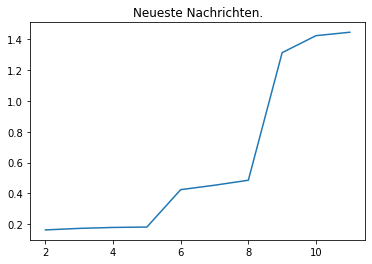

  0%|          | 0/6 [00:00<?, ?it/s]

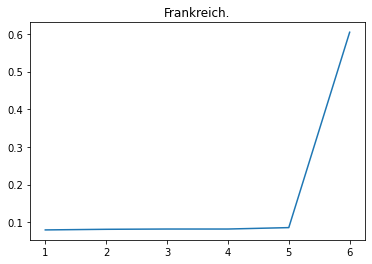

  0%|          | 0/9 [00:00<?, ?it/s]

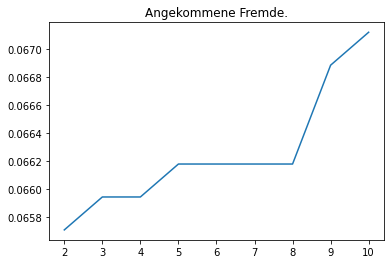

  0%|          | 0/6 [00:00<?, ?it/s]

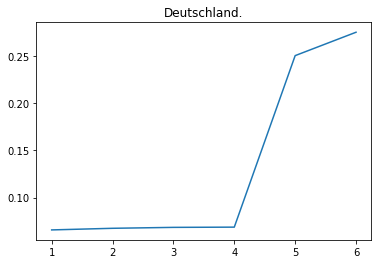

  0%|          | 0/12 [00:00<?, ?it/s]

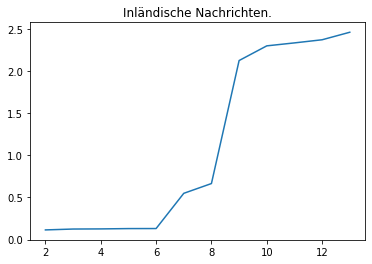

  0%|          | 0/6 [00:00<?, ?it/s]

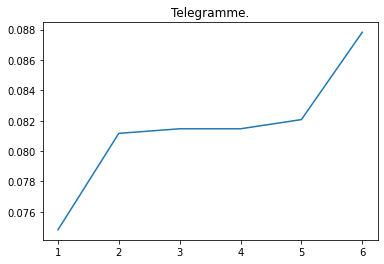

  0%|          | 0/8 [00:00<?, ?it/s]

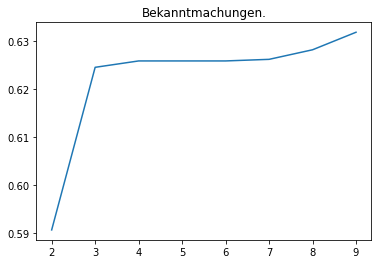

  0%|          | 0/6 [00:00<?, ?it/s]

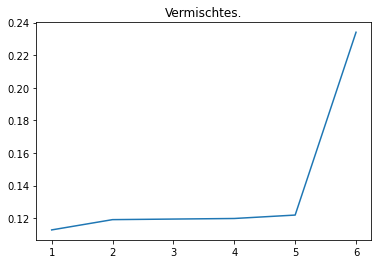

  0%|          | 0/12 [00:00<?, ?it/s]

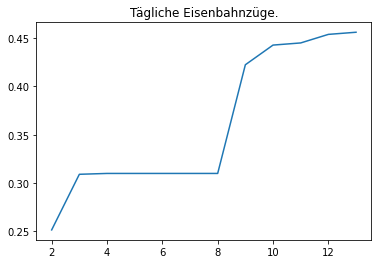

  0%|          | 0/16 [00:00<?, ?it/s]

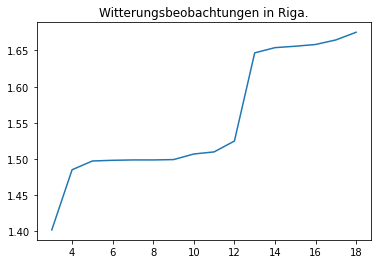

  0%|          | 0/6 [00:00<?, ?it/s]

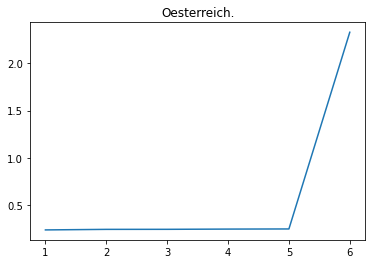

  0%|          | 0/8 [00:00<?, ?it/s]

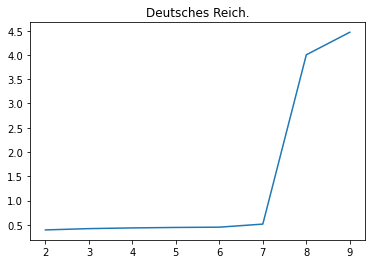

  0%|          | 0/14 [00:00<?, ?it/s]

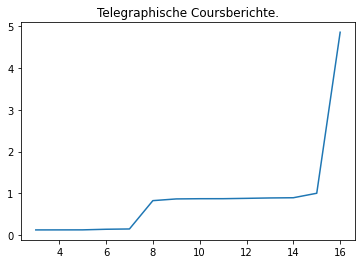

  0%|          | 0/7 [00:00<?, ?it/s]

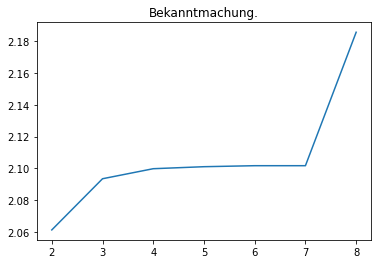

  0%|          | 0/16 [00:00<?, ?it/s]

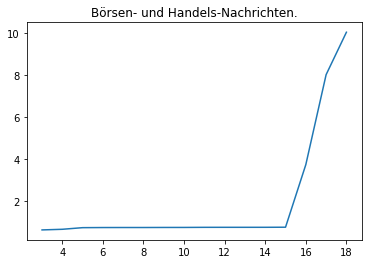

  0%|          | 0/12 [00:00<?, ?it/s]

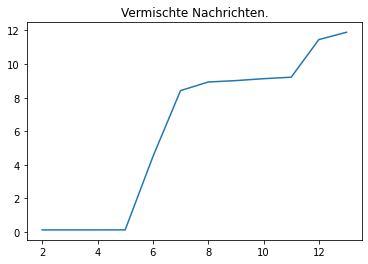

  0%|          | 0/13 [00:00<?, ?it/s]

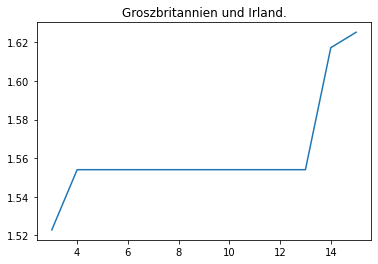

  0%|          | 0/9 [00:00<?, ?it/s]

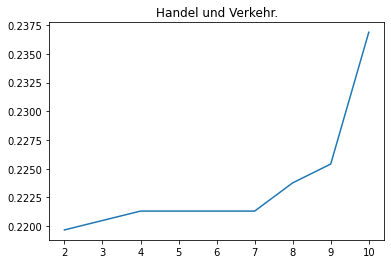

  0%|          | 0/13 [00:00<?, ?it/s]

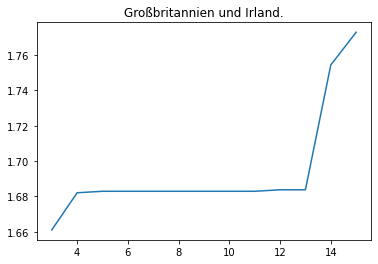

  0%|          | 0/25 [00:00<?, ?it/s]

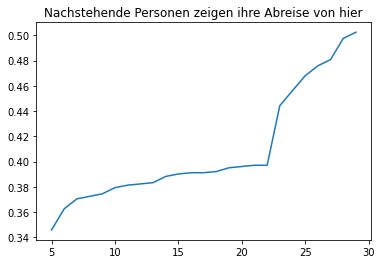

  0%|          | 0/17 [00:00<?, ?it/s]

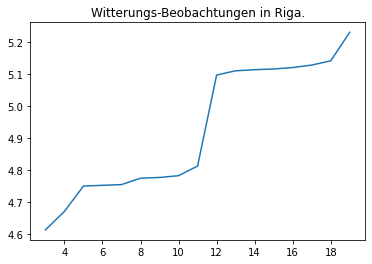

  0%|          | 0/16 [00:00<?, ?it/s]

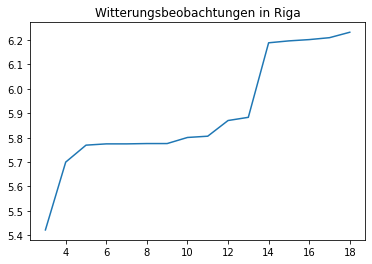

  0%|          | 0/17 [00:00<?, ?it/s]

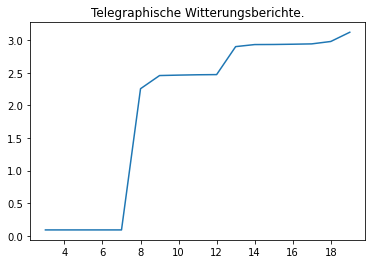

  0%|          | 0/7 [00:00<?, ?it/s]

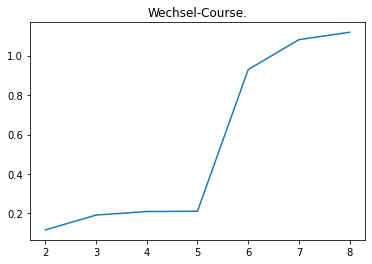

  0%|          | 0/9 [00:00<?, ?it/s]

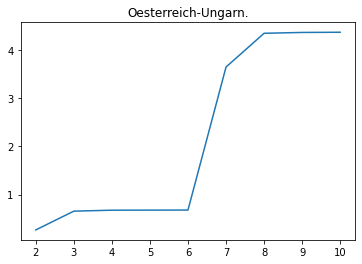

  0%|          | 0/16 [00:00<?, ?it/s]

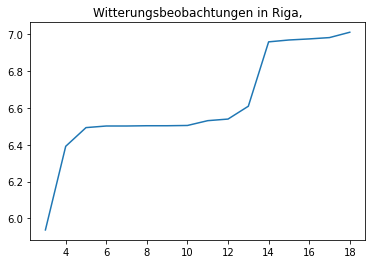

  0%|          | 0/11 [00:00<?, ?it/s]

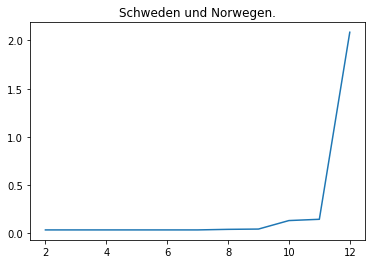

  0%|          | 0/7 [00:00<?, ?it/s]

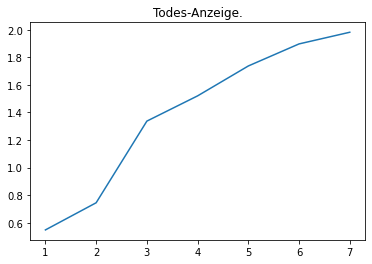

  0%|          | 0/7 [00:00<?, ?it/s]

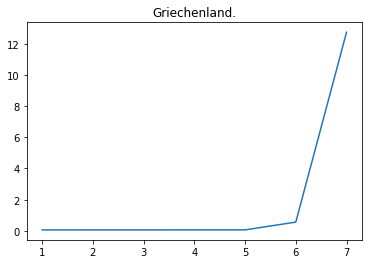

  0%|          | 0/7 [00:00<?, ?it/s]

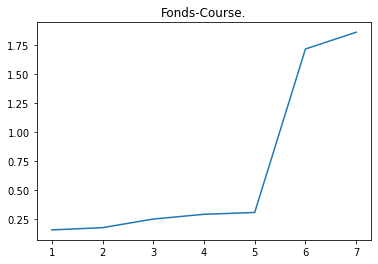

  0%|          | 0/6 [00:00<?, ?it/s]

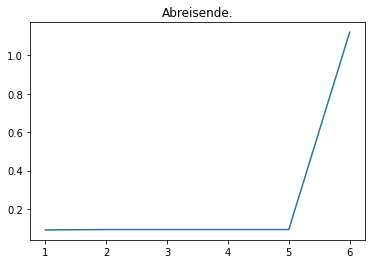

  0%|          | 0/15 [00:00<?, ?it/s]

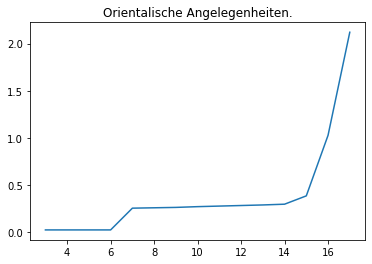

  0%|          | 0/7 [00:00<?, ?it/s]

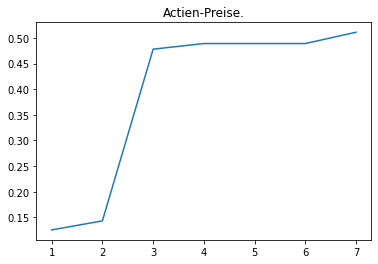

  0%|          | 0/7 [00:00<?, ?it/s]

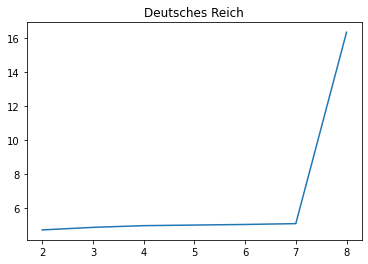

  0%|          | 0/25 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [312]:
for heading in sample_headings[:34]:
    try:
        get_elbow(heading)
    except KeyError:
        print(heading, 'ERROR')
        pass

In [748]:
elbow_dict = {'Neueste Nachrichten.': 5, 'Witterungsbeobachtungen in Riga': 12, 'Frankreich.': 4, 'Angekommene Fremde.': 8,
 'Deutschland.': 3, 'Inländische Nachrichten.': 2, 'Vermischtes.': 3,
 'St. Petersburg': 4, 'Telegramme.': 4, 'Bekanntmachungen.': 7, 'Oesterreich.': 2, 'Deutsches Reich.': 5,
 'Telegraphische Coursberichte.': 5, 'Vermischte Nachrichten.': 4, 'Groszbritannien und Irland.': 12,
 'Handel und Verkehr.' : 7, 'Nachstehende Personen zeigen ihre Abreise von hier': 22, 'Schweden und Norwegen.': 8,
 'Telegraphische Witterungsberichte.': 7, 'Wechsel-Course.': 5, 'Oesterreich-Ungarn.': 6, 'Todes-Anzeige.': 3,
 'Tägliche Eisenbahnzüge.': 8, 'Konstantinopel.': 5, 'Börsen- und Handels-Nachrichten.': 14, 'Griechenland.': 5,
 'Fonds-Course.': 5, 'Abreisende.': 5, 'Orientalische Angelegenheiten.': 6, 'Actien-Preise.': 4}

In [408]:
found_wordforms = set()

for heading, treshold in tqdm(elbow_dict.items()):
    results, increases = compare(heading, treshold)
    found_wordforms.update(results)

  0%|          | 0/30 [00:00<?, ?it/s]

In [409]:
len(found_wordforms)

1493

  0%|          | 0/25 [00:00<?, ?it/s]

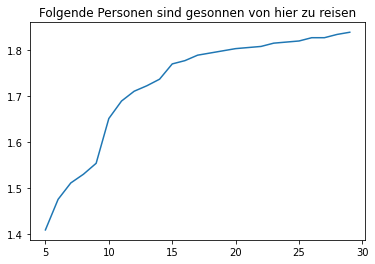

  0%|          | 0/11 [00:00<?, ?it/s]

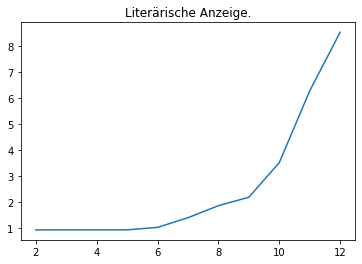

  0%|          | 0/6 [00:00<?, ?it/s]

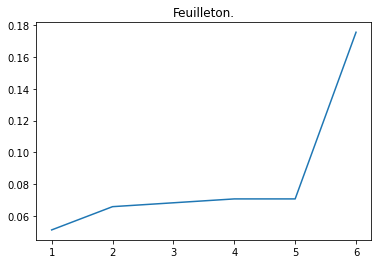

  0%|          | 0/14 [00:00<?, ?it/s]

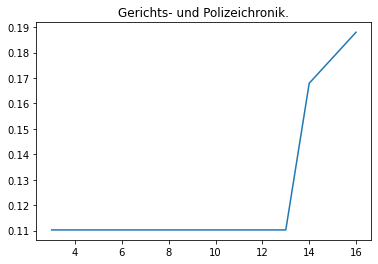

  0%|          | 0/24 [00:00<?, ?it/s]

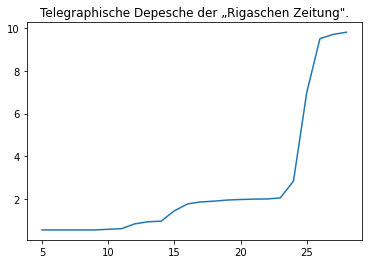

  0%|          | 0/7 [00:00<?, ?it/s]

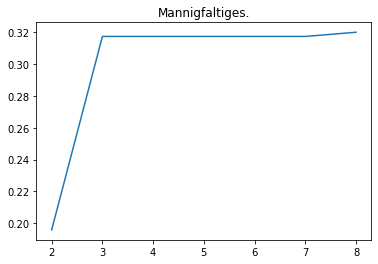

  0%|          | 0/6 [00:00<?, ?it/s]

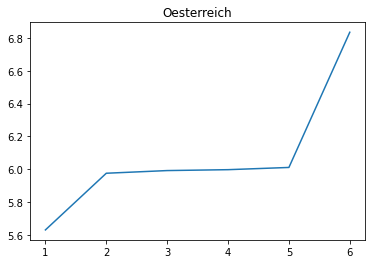

  0%|          | 0/12 [00:00<?, ?it/s]

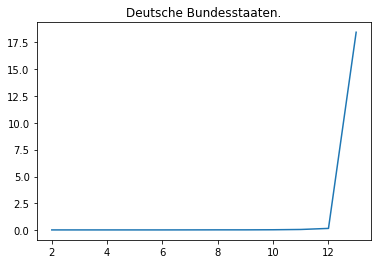

  0%|          | 0/6 [00:00<?, ?it/s]

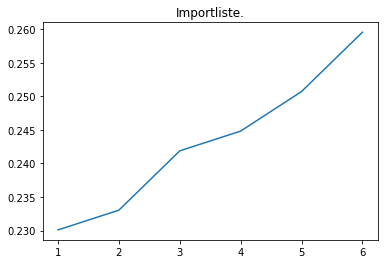

  0%|          | 0/12 [00:00<?, ?it/s]

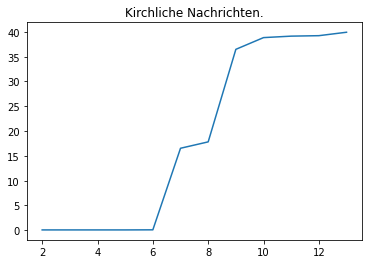

  0%|          | 0/18 [00:00<?, ?it/s]

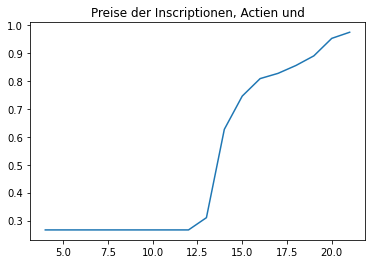

  0%|          | 0/13 [00:00<?, ?it/s]

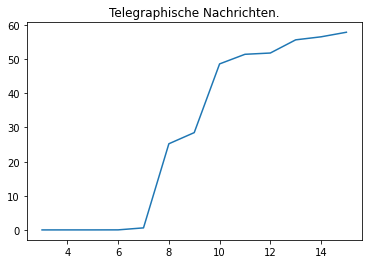

  0%|          | 0/6 [00:00<?, ?it/s]

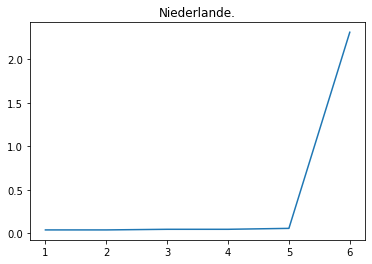

  0%|          | 0/17 [00:00<?, ?it/s]

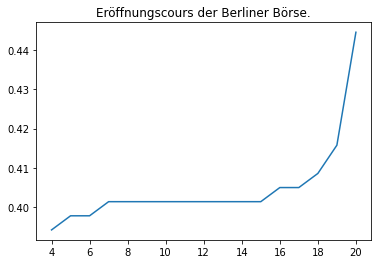

  0%|          | 0/6 [00:00<?, ?it/s]

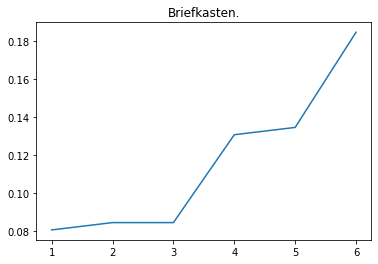

  0%|          | 0/25 [00:00<?, ?it/s]

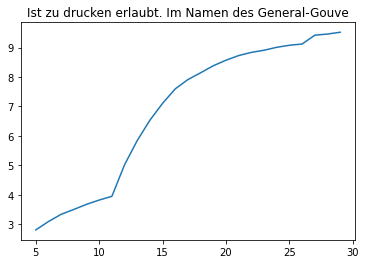

  0%|          | 0/7 [00:00<?, ?it/s]

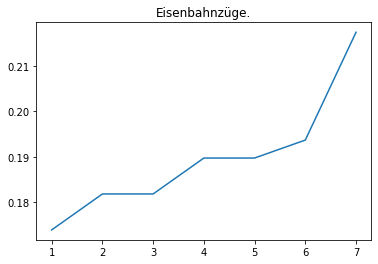

  0%|          | 0/9 [00:00<?, ?it/s]

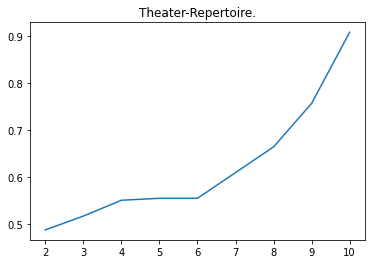

  0%|          | 0/19 [00:00<?, ?it/s]

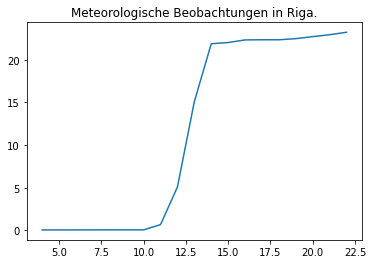

  0%|          | 0/11 [00:00<?, ?it/s]

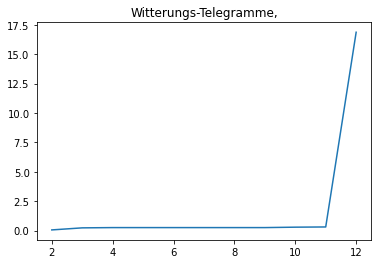

  0%|          | 0/16 [00:00<?, ?it/s]

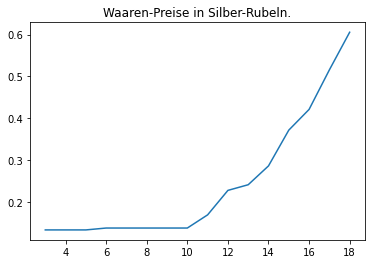

  0%|          | 0/17 [00:00<?, ?it/s]

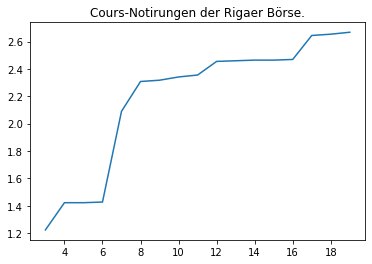

  0%|          | 0/13 [00:00<?, ?it/s]

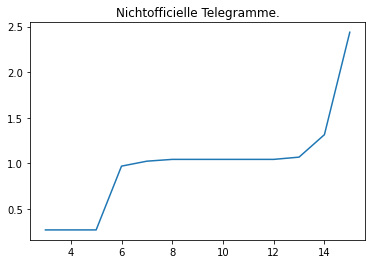

  0%|          | 0/9 [00:00<?, ?it/s]

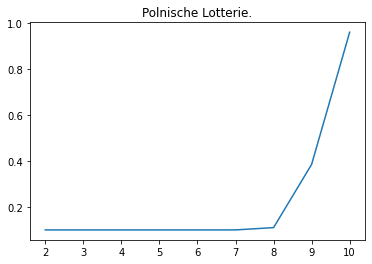

  0%|          | 0/11 [00:00<?, ?it/s]

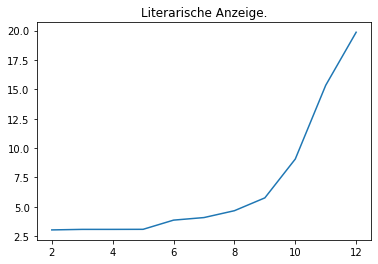

  0%|          | 0/17 [00:00<?, ?it/s]

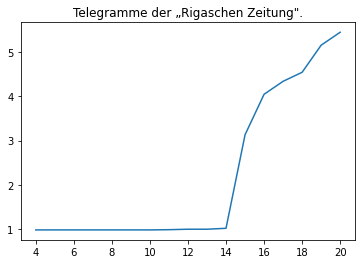

  0%|          | 0/17 [00:00<?, ?it/s]

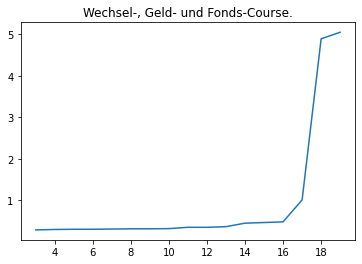

  0%|          | 0/25 [00:00<?, ?it/s]

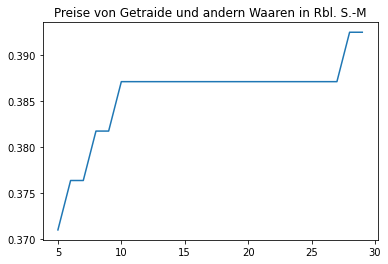

  0%|          | 0/7 [00:00<?, ?it/s]

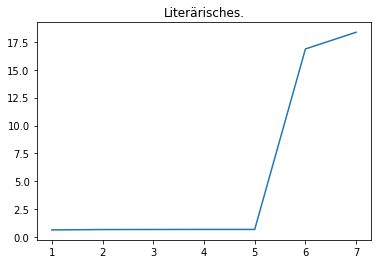

  0%|          | 0/18 [00:00<?, ?it/s]

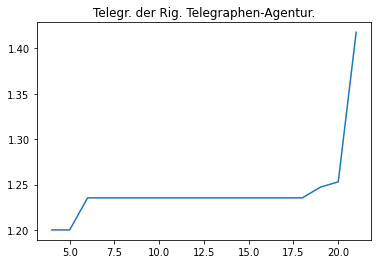

  0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [413]:
for heading in sample_headings[34:75]:
    if heading not in found_wordforms:
        get_elbow(heading)

In [751]:
elbow_dict2 = {'Folgende Personen sind gesonnen von hier zu reisen': 25, 'Literärische Anzeige.': 6, 'Feuilleton.': 5,
               'Gerichts- und Polizeichronik.': 12, 'Telegraphische Depesche der „Rigaschen Zeitung".': 16,
               'Mannigfaltiges.': 3, 'Deutsche Bundesstaaten.': 6, 'Importliste.': 5, 'Kirchliche Nachrichten.': 2,
               'Preise der Inscriptionen, Actien und': 20, 'Telegraphische Nachrichten.': 4, 'Niederlande.': 2,
               'Eröffnungscours der Berliner Börse.': 14, 'Briefkasten.': 4,
               'Ist zu drucken erlaubt. Im Namen des General-Gouve': 25, 'Eisenbahnzüge.': 5, 'Theater-Repertoire.': 6,
               'Meteorologische Beobachtungen in Riga.': 10, 'Witterungs-Telegramme,': 10,
               'Waaren-Preise in Silber-Rubeln.': 16, 'Cours-Notirungen der Rigaer Börse.': 14,
               'Nichtofficielle Telegramme.': 6, 'Polnische Lotterie.': 6, 'Telegramme der „Rigaschen Zeitung".': 10,
               'Wechsel-, Geld- und Fonds-Course.': 8, 'Preise von Getraide und andern Waaren in Rbl. S.-M': 10, 
               'Literärisches.': 5, 'Telegr. der Rig. Telegraphen-Agentur.': 18}

In [544]:
found_wordforms2 = set()

for heading, treshold in tqdm(elbow_dict2.items()):
    results, increases = compare(heading, treshold)
    found_wordforms2.update(results)

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

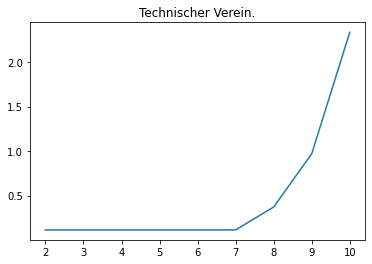

  0%|          | 0/7 [00:00<?, ?it/s]

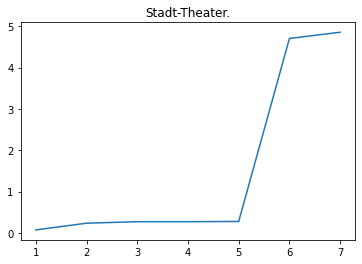

  0%|          | 0/8 [00:00<?, ?it/s]

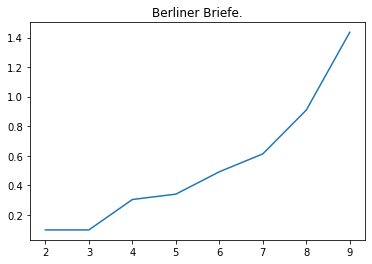

  0%|          | 0/17 [00:00<?, ?it/s]

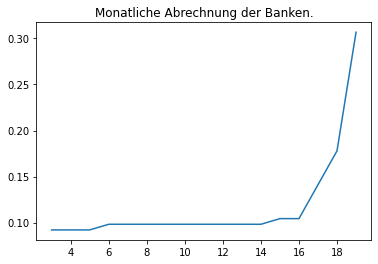

  0%|          | 0/20 [00:00<?, ?it/s]

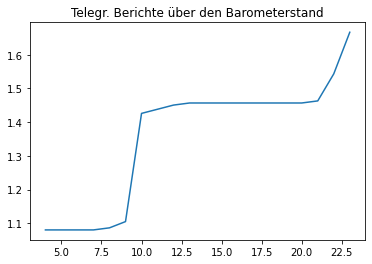

  0%|          | 0/8 [00:00<?, ?it/s]

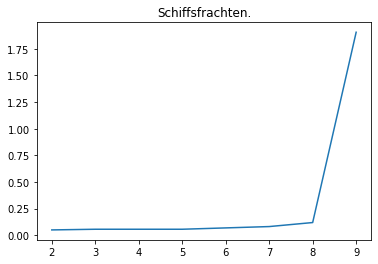

  0%|          | 0/11 [00:00<?, ?it/s]

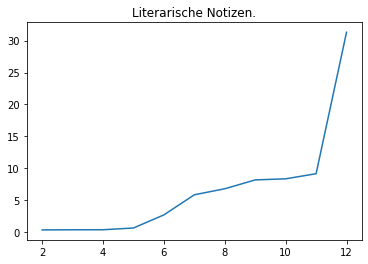

  0%|          | 0/8 [00:00<?, ?it/s]

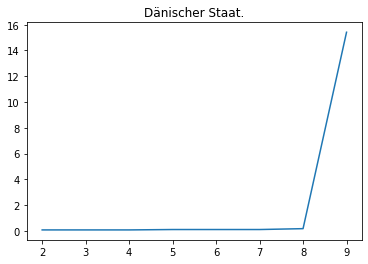

  0%|          | 0/5 [00:00<?, ?it/s]

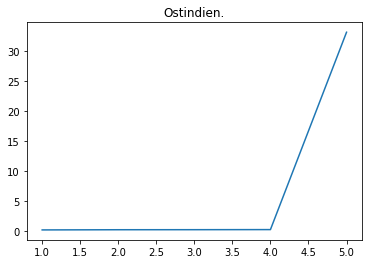

  0%|          | 0/6 [00:00<?, ?it/s]

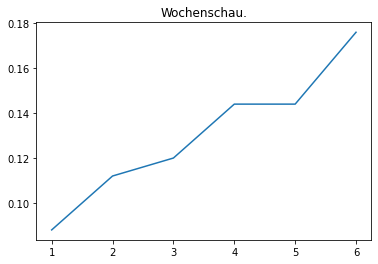

  0%|          | 0/22 [00:00<?, ?it/s]

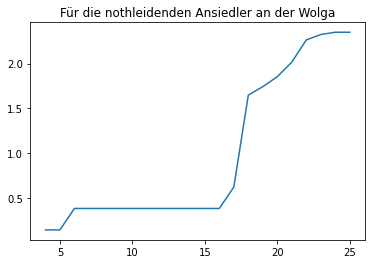

  0%|          | 0/13 [00:00<?, ?it/s]

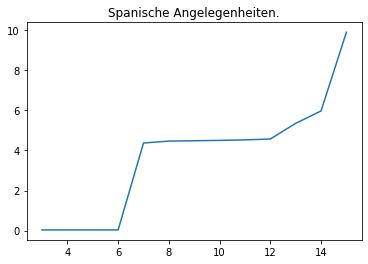

  0%|          | 0/18 [00:00<?, ?it/s]

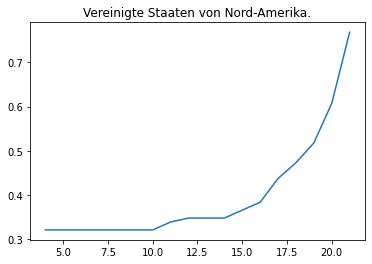

  0%|          | 0/9 [00:00<?, ?it/s]

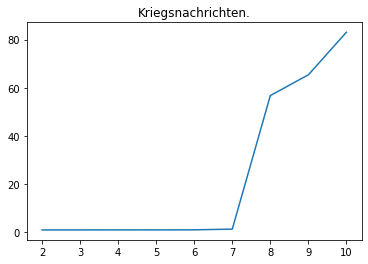

In [558]:
for heading in sample_headings[75:]:
    if heading not in found_wordforms.union(found_wordforms2):
        get_elbow(heading)

In [741]:
elbow_dict3 = {'Technischer Verein.': 7, 'Stadt-Theater.': 5, 'Berliner Briefe.': 3, 'Monatliche Abrechnung der Banken.': 14,
              'Telegr. Berichte über den Barometerstand': 20, 'Schiffsfrachten.': 5, 'Literarische Notizen.': 4,
               'Dänischer Staat.': 4, 'Ostindien.': 2, 'Wochenschau.': 3, 'Für die nothleidenden Ansiedler an der Wolga': 15,
               'Spanische Angelegenheiten.': 5, 'Vereinigte Staaten von Nord-Amerika.': 10, 'Kriegsnachrichten.': 4}

In [646]:
found_wordforms3 = set()

for heading, treshold in tqdm(elbow_dict3.items()):
    results, increases = compare(heading, treshold)
    found_wordforms3.update(results)

  0%|          | 0/14 [00:00<?, ?it/s]

In [643]:
sample_headings_short = df.heading.value_counts()[lambda x: x>100].index
sample_headings_short = [heading for heading in sample_headings_short if len(heading) < 10]

In [644]:
sample_headings_short

['Inland.',
 'Inhalt.',
 'Italien.',
 'Locales.',
 'England.',
 'Spanien.',
 'Amerika.',
 'Türkei.',
 'Schweiz.',
 'Ausland.',
 'Theater.',
 'Dänemark.',
 'Locales',
 'Belgien.',
 'Portugal.',
 'Inland',
 'Asien.',
 'Auktion.',
 'England',
 'Von Riga',
 'Serbien.',
 'Rumänien.',
 'Aegypten.',
 'Spanien',
 'Italien',
 'Inhalt',
 '(Schluß.)',
 'pr. Last',
 'Quittung.']

  0%|          | 0/3 [00:00<?, ?it/s]

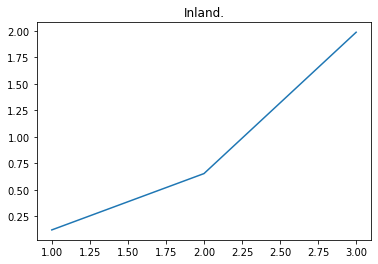

  0%|          | 0/3 [00:00<?, ?it/s]

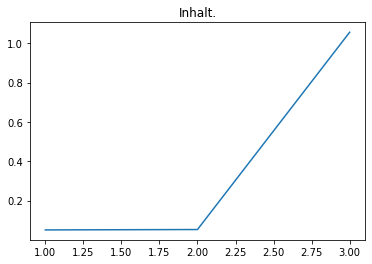

  0%|          | 0/4 [00:00<?, ?it/s]

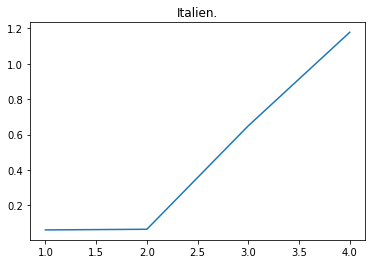

  0%|          | 0/4 [00:00<?, ?it/s]

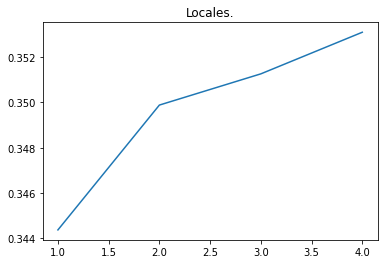

  0%|          | 0/4 [00:00<?, ?it/s]

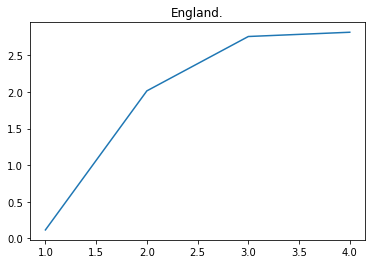

  0%|          | 0/4 [00:00<?, ?it/s]

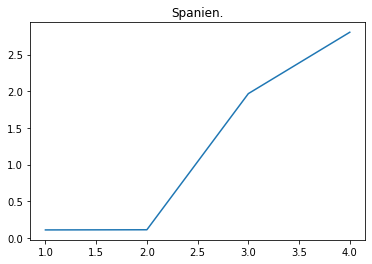

  0%|          | 0/4 [00:00<?, ?it/s]

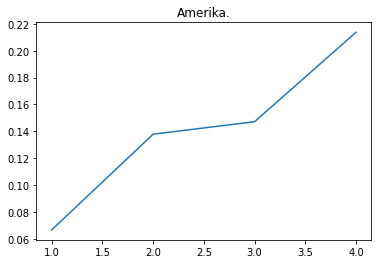

  0%|          | 0/3 [00:00<?, ?it/s]

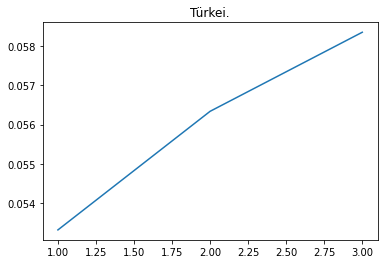

  0%|          | 0/4 [00:00<?, ?it/s]

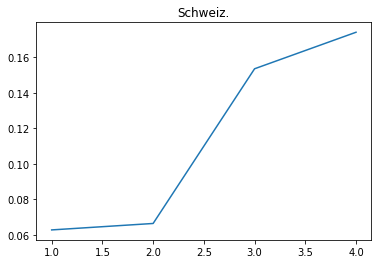

  0%|          | 0/4 [00:00<?, ?it/s]

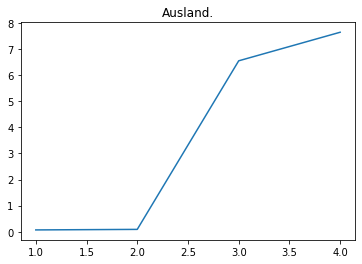

  0%|          | 0/4 [00:00<?, ?it/s]

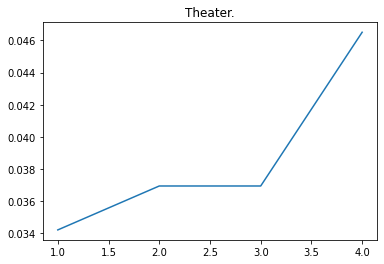

  0%|          | 0/4 [00:00<?, ?it/s]

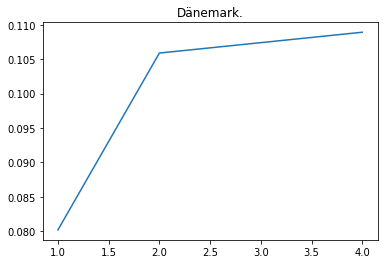

  0%|          | 0/3 [00:00<?, ?it/s]

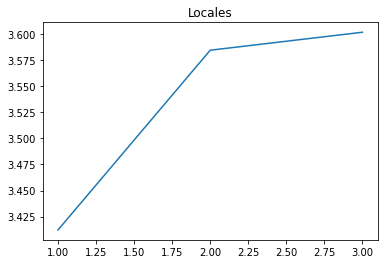

  0%|          | 0/4 [00:00<?, ?it/s]

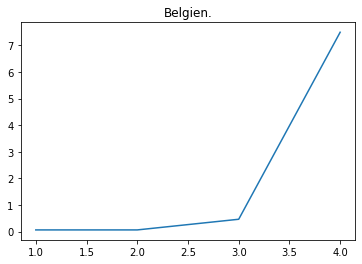

  0%|          | 0/4 [00:00<?, ?it/s]

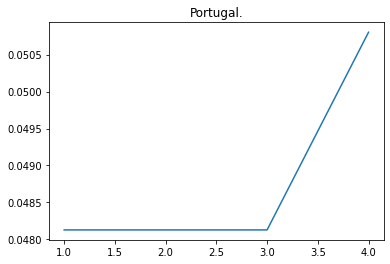

  0%|          | 0/3 [00:00<?, ?it/s]

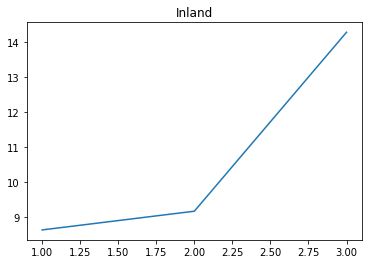

  0%|          | 0/3 [00:00<?, ?it/s]

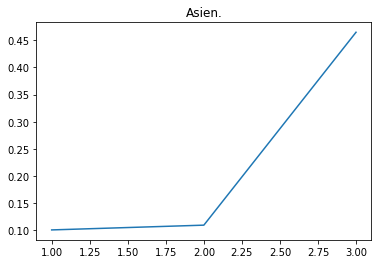

  0%|          | 0/4 [00:00<?, ?it/s]

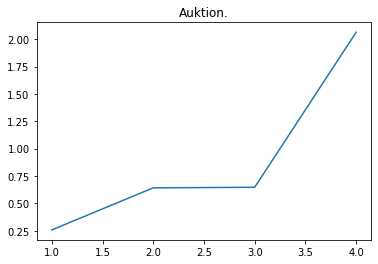

  0%|          | 0/3 [00:00<?, ?it/s]

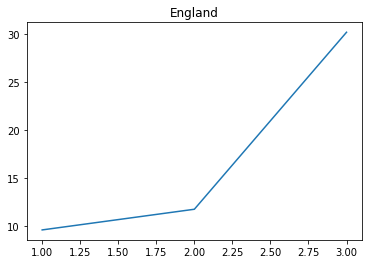

  0%|          | 0/4 [00:00<?, ?it/s]

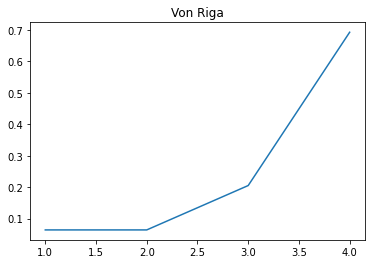

  0%|          | 0/4 [00:00<?, ?it/s]

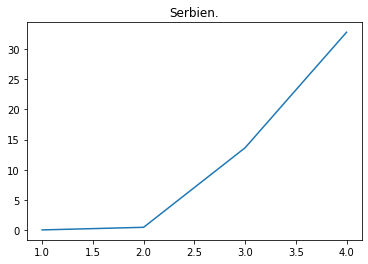

  0%|          | 0/4 [00:00<?, ?it/s]

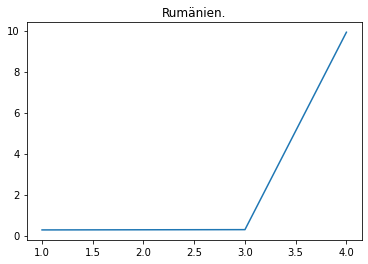

  0%|          | 0/4 [00:00<?, ?it/s]

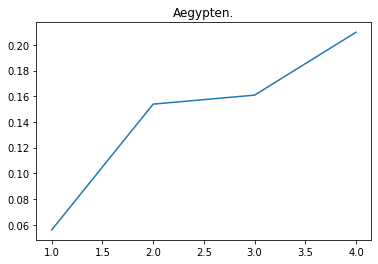

  0%|          | 0/3 [00:00<?, ?it/s]

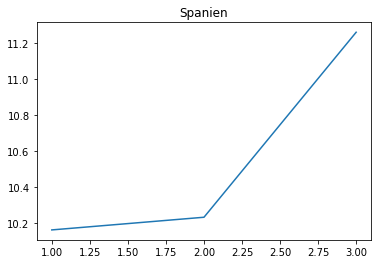

  0%|          | 0/3 [00:00<?, ?it/s]

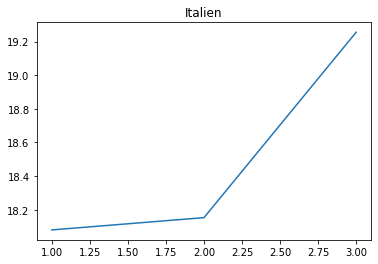

  0%|          | 0/3 [00:00<?, ?it/s]

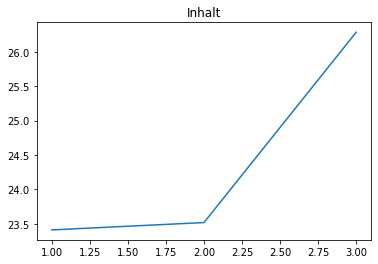

  0%|          | 0/4 [00:00<?, ?it/s]

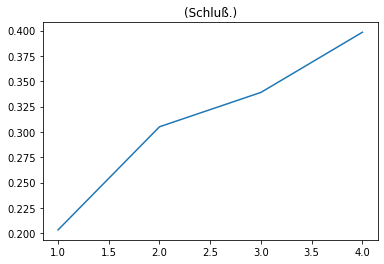

  0%|          | 0/4 [00:00<?, ?it/s]

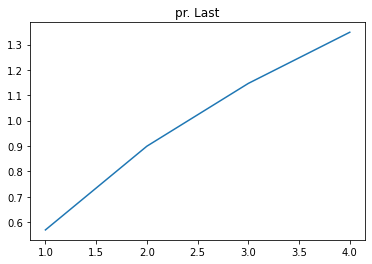

  0%|          | 0/4 [00:00<?, ?it/s]

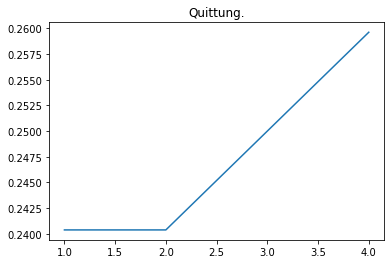

In [648]:
for heading in sample_headings_short:
    if heading not in found_wordforms.union(found_wordforms2).union(found_wordforms3):
        get_elbow(heading)

In [742]:
elbow_dict4 = {'Inland.': 1, 'Inhalt.': 2, 'Italien.': 2, 'Locales.': 3, 'England.': 1, 'Spanien.': 2, 'Türkei.': 3,
              'Schweiz.': 2, 'Ausland.': 1, 'Theater.': 3, 'Dänemark.': 72, 'Belgien.': 1, 'Portugal.': 1,
              'Asien.': 1, 'Auktion.': 3, 'Von Riga': 4, 'Serbien.': 1, 'Rumänien.': 3, 'Aegypten.': 2, '(Schluß.)': 4,
              'pr. Last': 4, 'Quittung.': 3}

In [752]:
elbow_dict_final = elbow_dict | elbow_dict2 | elbow_dict3 | elbow_dict4

In [761]:
with open('../pipeline/headings_elbow_dict.json', 'w', encoding='utf8') as f:
    json.dump(elbow_dict_final, f)

In [753]:
for key in elbow_dict_final.keys():
    if key not in sample_headings+sample_headings_short:
        print(key)

St. Petersburg
Konstantinopel.


In [ ]:
# exceptions: irland, island not in inland; afrika. not in amerika

In [412]:
#changed_entries = 0
#for wordform in tqdm(found_wordforms):
#    changed_entries += df.heading.value_counts()[wordform]
#print(changed_entries)

## improve heading2

In [3]:
#from climdist.data_preprocess import generate_alt_headings

In [4]:
nlp = spacy.load('../data/models/spacy_ner_151121/model-best/')

In [60]:
def alt_heading(heading):
    doc = nlp(heading)
    alt_heading = ''
    locs = [ent for ent in doc.ents if ent.label_ == 'LOC']
    if len(locs) > 0:
        print(locs)
        if len(locs) == 1 or locs[0].start == 0:
            alt_heading = locs[0].text
                
    return alt_heading

In [46]:
def generate_alt_headings(df, ignorelocs, nlp,
                          output_path=None):

    """Input: main df with normalized headings. Use a trained NLP model for detecting LOC entities in headings.
        Output: column with alternate headings for simpler geographical analysis.
        Can take 1-2 hours."""
    
    df['heading2'] = df['heading']
    
    for i, heading in tqdm(df.heading2.iteritems()):
        doc = nlp(heading)
        locs = [ent for ent in doc.ents if ent.label_ == 'LOC']
        if len(locs) > 0:
            if len(locs) == 1 or locs[0].start == 0:
                if locs[0].text not in ignorelocs:
                    df.loc[i, 'heading2'] = locs[0].text

    if output_path:
        df['heading2'].to_parquet(output_path, index=True)
    
    return df['heading2']

In [19]:
with open('../temp/typhon_index.json', 'r', encoding='utf8') as f:
    typhon_index = json.load(f)

In [48]:
typhon_headings = generate_alt_headings(typhon_df, ignorelocs= ['Riga'], nlp=nlp)

234it [00:01, 154.46it/s]


In [52]:
example_heading = df.heading2[df.heading2.str.contains('Japan. Ueber San FranziSto und Newyork treffen N', na=False)]

In [62]:
alt_heading('Japan. Yokuhama, 2. Dec. (20. November). Der M...')

[Yokuhama]


'Yokuhama'

In [31]:
typhon_df = df.loc[typhon_index]

In [37]:
typhon_df

,date,year,month,day,pub,heading,full_text,href,text_len,readability,heading2
147243,1860-04-20,1860,4,20,Rigasche Zeitung,Inländische Nachrichten. Inländische Nachrichte«.,Inländische Nachrichten. Inländische Nachricht...,https://proc.dom.lndb.lv/file.axd?id=11404404&...,7484,1,Inländische Nachrichten. Inländische Nachrichte«.
147243,1860-04-20,1860,4,20,Rigasche Zeitung,Inländische Nachrichten. Inländische Nachrichte«.,Inländische Nachrichten. Inländische Nachricht...,https://proc.dom.lndb.lv/file.axd?id=11404404&...,7484,1,Inländische Nachrichten. Inländische Nachrichte«.
147243,1860-04-20,1860,4,20,Rigasche Zeitung,Inländische Nachrichten. Inländische Nachrichte«.,Inländische Nachrichten. Inländische Nachricht...,https://proc.dom.lndb.lv/file.axd?id=11404404&...,7484,1,Inländische Nachrichten. Inländische Nachrichte«.
149003,1860-09-28,1860,9,28,Rigasche Zeitung,Das Journal des russischen Marine – Ministeriu...,Das Journal des russischen Marine – Ministeriu...,https://proc.dom.lndb.lv/file.axd?id=10724868&...,4551,1,Das Journal des russischen Marine – Ministeriu...
155896,1862-04-30,1862,4,30,Rigasche Zeitung,"* London, 4. Mai (22. April). Die „Morning-Pos...","* London, 4. Mai (22. April). Die „Morning-Pos...",https://proc.dom.lndb.lv/file.axd?id=7690943&a...,3601,1,"* London, 4. Mai (22. April). Die „Morning-Pos..."
...,...,...,...,...,...,...,...,...,...,...,...
192542,1869-08-02,1869,8,2,Rigasche Zeitung,Asien.,"Asien.\n\n\tJapan. Die ~A. A. Z."" Heilt mehrer...",https://proc.dom.lndb.lv/file.axd?id=10865501&...,12634,1,Asien.
193347,1869-09-19,1869,9,19,Rigasche Zeitung,Yokuhama 26. (14 ) Juli. Am 3. d. M. ist das O...,Yokuhama 26. (14 ) Juli. Am 3. d. M. ist das O...,https://proc.dom.lndb.lv/file.axd?id=2573703&a...,6188,1,Yokuhama 26. (14 ) Juli. Am 3. d. M. ist das O...
193639,1869-10-07,1869,10,7,Rigasche Zeitung,Asien.,Asien.\n\n\tYoknham ~ 10. Aug. (29. Juli.) Es ...,https://proc.dom.lndb.lv/file.axd?id=4711227&a...,2852,1,Asien.
194971,1869-12-22,1869,12,22,Rigasche Zeitung,"Japan. Yokuhama, 2. Dec. (20. November). Der M...","Japan. Yokuhama, 2. Dec. (20. November). Der M...",https://proc.dom.lndb.lv/file.axd?id=10363325&...,586,1,"Japan. Yokuhama, 2. Dec. (20. November). Der M..."


## Vector average

In [65]:
def vector_mean(keys):
    
    sum_vec = np.zeros(100,)
    for key in keys:
        if model.has_index_for(key):
            sum_vec += model.get_vector(key)
        
    mean_vec = sum_vec/len(keys)
        
    #print(model.most_similar(mean_vec))
    return mean_vec

In [142]:
def create_heading_vectors(df):
    
    vectors = []
    
    for heading in tqdm(df.heading):
        heading_vec = list(vector_mean(heading.strip('.').split()))
        heading_vec.insert(0, heading.strip('.'))
        vectors.append(heading_vec)
        
    return pd.DataFrame(vectors, columns=(['heading']+list(range(100)))).set_index('heading')

In [204]:
def create_heading_vectors_str(df):
    
    vectors = ''
    vectors += (str(len(df.heading2.unique()))) + ' 100\n' #write meteadata
    
    for heading in tqdm(df.heading2.unique()):
        try:
            heading_vec = vector_mean(heading.strip('.').split())
            line = heading.replace(' ', '_') + ' ' + ' '.join([str(num) for num in heading_vec])
            vectors += line
            vectors += '\n'
        except:
            pass
        
    return vectors

In [8]:
def format_heading(heading):
    return heading.strip('.').replace(' ', '_')

In [205]:
vectors = create_heading_vectors_str(df)

 61%|█████████████████████████████████████████████▏                            | 52951/86598 [51:11<1:07:15,  8.34it/s]C:\Users\krister\AppData\Local\Temp/ipykernel_27420/3645892505.py:8: RuntimeWarning: invalid value encountered in true_divide
  mean_vec = sum_vec/len(keys)
100%|██████████████████████████████████████████████████████████████████████████| 86598/86598 [2:11:33<00:00, 10.97it/s]


In [ ]:
with open('../temp/heading_vectors.txt', 'w', encoding='utf8') as f:
    f.write(vectors)

In [2]:
heading_model = gensim.models.word2vec.KeyedVectors.load_word2vec_format('../temp/heading_vectors.txt')

In [9]:
for heading in df.heading2.sample(10):
    print(heading) 
    print(heading_model.most_similar(format_heading(heading)))
    print('\n\n')

Oesterreich
[('Oesterreich_–_Ungarn', 0.946531355381012), ('Oesterreich_Ungarn', 0.946531355381012), ('Oesterreich-Ungarn', 0.8309103846549988), ('Preußen', 0.811760663986206), ('Ungarn', 0.7910464406013489), ('Socialpädagogisches_aus_Deutschland', 0.7641233205795288), ('Deutschland', 0.7641233205795288), ('—_Zwischen_den_Höfen_von_Dänemark_und_Preußen_ist', 0.7450395226478577), ('Italien', 0.737226128578186), ('Frankreich', 0.6938095688819885)]



Waaren-Preise in Silber-Rubeln


KeyError: "Key 'Waaren-Preise_in_Silber-Rubeln' not present"

## doc2vec

In [16]:
nlp = spacy.load('de_core_news_md')

In [21]:
def token_is_garbage(token, treshold=0.3):
    
    allowed_symbols = string.ascii_letters + '0123456789.äüö'
    
    non_alphabetical = 0
    for symbol in token.text:
        if symbol not in allowed_symbols:
            non_alphabetical += 1
            
    if non_alphabetical/len(token.text) >= treshold:
        return True
    else:
        return False
    

def cleanup_heading(heading, nlp):
    
    doc = nlp(heading)
    word_list = []
    for token in doc:
        if not token.is_stop and token.pos_ not in ['PUNCT', 'SPACE', 'NUM']:
            if token_is_garbage(token) == False:
                word_list.append(token.text)

    return word_list

In [22]:
df.heading2.sample(100).apply(lambda x: cleanup_heading(x, nlp))

78984                  [bcrclls, besprochene, dramamme]
98604                                     [Deutschland]
73697                                 [St., Petersburg]
18525                                        [Verlören]
86660                                      [Frankreich]
                              ...                      
49898                                 [St., Petersburg]
224388        [Riga, 2., August, fahren, iv, Reproduct]
70958                               [Bayerisches, Bier]
260010    [Riga, 27., Juli, Ueber, Reise, Kaiserlichen]
82646       [u, drucken, erlaubt, Namen, General-Gouve]
Name: heading2, Length: 100, dtype: object

In [39]:
def create_corpus(df):
    for i, heading in tqdm(df.heading2.iteritems()):
        if heading != None:
            yield gensim.models.doc2vec.TaggedDocument(cleanup_heading(heading, nlp), [i])

In [45]:
train_corpus = list(create_corpus(df.sample(50000)))

50000it [08:44, 95.34it/s] 


In [46]:
d2v = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=30)

In [47]:
d2v.build_vocab(train_corpus)

In [48]:
d2v.train(train_corpus, total_examples=d2v.corpus_count, epochs=d2v.epochs)

In [59]:
def similarity_examples(n):
    
    for i in np.random.randint(0, len(train_corpus), n):
        print(df.loc[i, 'heading2'], '\n')
        for sim in d2v.dv.most_similar(train_corpus[100][1]):
            print(df.loc[sim[0], 'heading2'])
        print('\n\n')

In [62]:
similarity_examples(10)

Paris 

Berlin. 17. (5 ) März. In der alten Hanse« und Haf
PariS 5. Juni (24. Mai). Der Baron Lareinty. Deleg
Riga. Im Monat März dieses Jahres ist zu Lande und
Wien, 7. Januar. Die „Preise" enlbäll ans Paris di
Madrid, 27. October. AuS Lissabon wird mitgetheilt
Riga, 19. Juli. In der letzten Börsen- und Hantels
Riga 16. October. Vorgestern Mittag um 2 Uhr fand
Riga, 22. December. St. Petersburg, 21. December
P. G Konstantinopel, 4. Januar (23. December). Bek
PairSkammer. 3. April. Verhandlungen über einen Ge



Bekanntmachungen 

Berlin. 17. (5 ) März. In der alten Hanse« und Haf
PariS 5. Juni (24. Mai). Der Baron Lareinty. Deleg
Riga. Im Monat März dieses Jahres ist zu Lande und
Wien, 7. Januar. Die „Preise" enlbäll ans Paris di
Madrid, 27. October. AuS Lissabon wird mitgetheilt
Riga, 19. Juli. In der letzten Börsen- und Hantels
Riga 16. October. Vorgestern Mittag um 2 Uhr fand
Riga, 22. December. St. Petersburg, 21. December
P. G Konstantinopel, 4. Januar (23. December). Bek
PairSka